In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats
from matplotlib.colors import ListedColormap

Force Pandas to show all columns respectively rows

In [ ]:
DATASET_DIR = r"/home/av639747/Dokumente/masterarbeit/2024_ma_voss_transfer_learning/artifacts"
DATASET_NAME = "theta_posix_withapps_no_negative_outliers_no_mira_no_time_witherrors_withresults.csv"
DATASET_PATH = Path(DATASET_DIR, DATASET_NAME).with_suffix(".csv")

In [ ]:
df_theta_posix = pd.read_csv(DATASET_PATH)

In [5]:
df_blue_waters_posix = pd.read_csv(Path(r"/home/rwth1591/transfer-learning/blue_waters/data/blue_waters_dataset_processed/blue_waters_posix_withapps_no_negative_outliers_no_time_witherrors.csv"))

In [6]:
len(df_theta_posix)

218111

In [33]:
len(df_blue_waters_posix)

792311

**inputs for nwchem are mostly 0!**

In [6]:
df_theta_posix[df_theta_posix.app == "nwchem"].loc[:, (df_theta_posix[df_theta_posix.app == "nwchem"] == 0).all()]

,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,...,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS
3330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
most_used_apps = df_theta_posix.groupby(by=["app"]).count()["nprocs"].sort_values(ascending=False)

In [13]:
len(most_used_apps)

342

In [6]:
most_used_apps["cp2k.psmp"]

8626

In [7]:
most_used_apps_blue_waters = df_blue_waters_posix.groupby(by=["app"]).count()["nprocs"].sort_values(ascending=False)

In [15]:
len(most_used_apps_blue_waters)

900

## Plot the ok predictions (i.e. correct order of magnitude)

In [ ]:
ok_predictions = df_theta_posix[np.abs(np.log(df_theta_posix.POSIX_TOTAL_TIME) -
                np.log(df_theta_posix.POSIX_TOTAL_TIME_predicted))
               < 2]
ok_predictions_counts = ok_predictions.groupby(by=["app"]).count()["nprocs"].sort_values(ascending=False)
#If you want percentages
#(ok_predictions_counts / most_used_apps[most_used_apps.index.isin(ok_predictions_counts.index)]) * 100
ok_predictions_counts

/cvmfs/sys.hpc.itc.rwth-aachen.de/jupyter/clients/ipython/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


app
pw.x                         40937
gmx_mpi                      10965
vasp_std                      8467
qb                            7644
predict.x-2.0.3-ThetaCray     4485
                             ...  
flash4                           1
dint2-PIPpot.x.opt               1
dftbplus.x                       1
cosmotools-driver                1
zeltron.exe                      1
Name: nprocs, Length: 167, dtype: int64

In [69]:
def plot_ok_predictions(app_name):
    filterspec = (df_theta_posix.app.str.contains(app_name))#
    filterspec_goodpred = (df_theta_posix.index.isin(ok_predictions.index) == True)
    ax = df_theta_posix[filterspec].plot.scatter(x="POSIX_TOTAL_TIME",y="POSIX_TOTAL_TIME",label="expected output",c="navy")
    df_theta_posix[filterspec & (filterspec_goodpred == False)].plot.scatter(x="POSIX_TOTAL_TIME",y="POSIX_TOTAL_TIME_predicted",ax=ax, c="orange",label="predictions")#, c=kernel,cmap="viridis", colorbar=True)
    df_theta_posix[filterspec & (filterspec_goodpred == True)].plot.scatter(x="POSIX_TOTAL_TIME",y="POSIX_TOTAL_TIME_predicted",ax=ax, c="limegreen",label="correct order of magnitude")
    ax.set_yscale("log")
    ax.set_xscale("log")

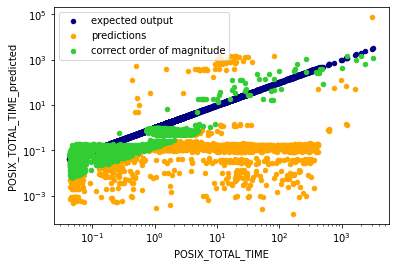

In [70]:
plot_ok_predictions("pw.x")
plt.savefig(Path("pictures","theta_transfer_pwx_ok_predictions").with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)

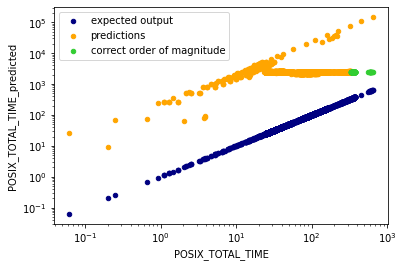

In [71]:
plot_ok_predictions("cp2k.psmp")
plt.savefig(Path("pictures","theta_transfer_cp2k_ok_predictions").with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)

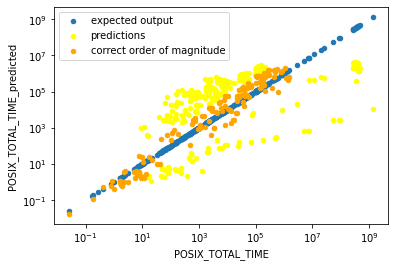

In [20]:
plot_ok_predictions("rxmd")

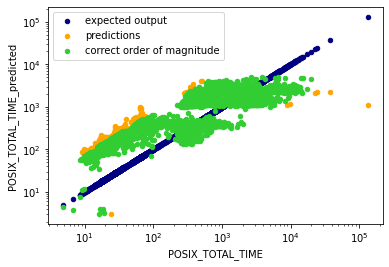

In [72]:
plot_ok_predictions("vasp_std")

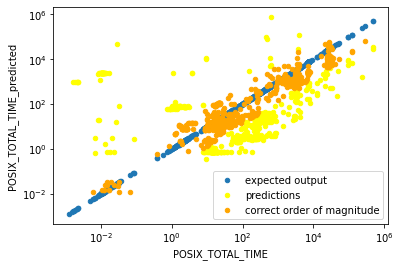

In [22]:
plot_ok_predictions("nek5000")

## Comparison of app occurences between Theta and Blue Waters

In [78]:
app_counts = pd.DataFrame(most_used_apps.rename("count")).join(pd.DataFrame(most_used_apps_blue_waters.rename("count")),how='outer',lsuffix='_theta',rsuffix='_blue_waters')
app_counts["ok_predictions"] = ok_predictions_counts
app_counts[app_counts.index.str.contains("cp2k")]

,count_theta,count_blue_waters,ok_predictions
app,,,
cp2k.psmp,8626.0,NaN,129.0
cp2k_2.5.1.popt,NaN,144.0,NaN


In [32]:
app_counts.to_csv("/home/av639747/Dokumente/masterarbeit/apps_in_blue_waters_and_theta.csv")

## Create overview of prediction quality per app

In [ ]:
abs_errors = (df_theta_posix.POSIX_TOTAL_TIME - df_theta_posix.POSIX_TOTAL_TIME_predicted).abs()
abs_errors_percent = abs_errors / df_theta_posix["mean"]
df_app_overview = pd.DataFrame()
df_app_overview["error_percent"] = abs_errors_percent
#df_app_overview["dup_mean"] = df_theta_posix["mean"]
df_app_overview["app"] = df_theta_posix.app
df_app_overview["POSIX_TOTAL_TIME"] = df_theta_posix.POSIX_TOTAL_TIME
df_app_overview["POSIX_TOTAL_TIME_predicted"] = df_theta_posix.POSIX_TOTAL_TIME_predicted
df_app_overview_agg = df_app_overview.groupby("app").agg({
    "app":"count",
    "error_percent":["median","count"],
    "POSIX_TOTAL_TIME":["mean","var"],
    "POSIX_TOTAL_TIME_predicted":["mean","var"]
}).sort_values(by=[("app","count"),("error_percent","median")],ascending=False)
df_app_overview_agg[df_app_overview_agg.index.str.contains("")]

In [9]:
abs_errors = (df_theta_posix.POSIX_TOTAL_TIME - df_theta_posix.POSIX_TOTAL_TIME_predicted).abs()
abs_errors_percent = abs_errors / df_theta_posix["mean"]
df_mae_by_app = pd.DataFrame()
df_mae_by_app["error_percent"] = abs_errors_percent
df_mae_by_app["dup_mean"] = df_theta_posix["mean"]
df_mae_by_app["app"] = df_theta_posix.app
df_mae_by_app["POSIX_TOTAL_TIME"] = df_theta_posix.POSIX_TOTAL_TIME
df_mae_by_app["POSIX_TOTAL_TIME_predicted"] = df_theta_posix.POSIX_TOTAL_TIME_predicted
df_mae_by_app_agg = df_mae_by_app.groupby(["app","dup_mean"]).agg({
    "app":"count",
    "error_percent":["median","count"],
    "POSIX_TOTAL_TIME":["mean","var"],
    "POSIX_TOTAL_TIME_predicted":["mean","var"]
}).sort_index(level=["dup_mean"],ascending=False)

In [16]:
df_mae_by_app_agg.to_csv("theta_mae_mean_by_app_by_dup_mean.csv")

### IQR Criterion for Behaviour Similarity

In [5]:
pwx_df = df_theta_posix.loc[:,["app","mean","POSIX_TOTAL_TIME"]]
iqr_counts = pwx_df.groupby(["app","mean"]).agg(lambda x: x[x > x.quantile(0.75) + (1.5 * x.quantile(0.75) - x.quantile(0.25))].count())

In [10]:
iqr_counts.groupby(["app"]).sum().sort_values(by=["POSIX_TOTAL_TIME"],ascending=False)

,POSIX_TOTAL_TIME
app,
nwchem,4562
pw.x,1898
gmx_mpi,203
xmfdn-menj-lan,55
bs-solctra-multinode,14
...,...
c12cx.gr.x_41,0
c12cx.gr.x_42,0
c12cx.gr.x_43,0


## Cross-Correlation Criterion

In [48]:
quantile_distances = df_theta_posix.loc[:,["app","mean","POSIX_TOTAL_TIME","POSIX_TOTAL_TIME_predicted"]].groupby(["app","mean"]).agg({
    "mean":"count",
    "POSIX_TOTAL_TIME":lambda x: x.quantile(0.75) - x.median(),
    "POSIX_TOTAL_TIME_predicted":lambda x: x.median() - x.quantile(0.25)
})

In [52]:
pwx_dists = quantile_distances[quantile_distances.index.get_level_values("app").str.contains("pw.x")]
pwx_dists[pwx_dists["mean"] > 100].corr()

,mean,POSIX_TOTAL_TIME,POSIX_TOTAL_TIME_predicted
mean,1.000000,-0.122367,-0.247590
POSIX_TOTAL_TIME,-0.122367,1.000000,0.333966
POSIX_TOTAL_TIME_predicted,-0.247590,0.333966,1.000000


## Investigate the reasons for outliers

In [12]:
df_theta_posix[df_theta_posix["mean"] == 22.203737326696807].sort_values("error")

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,POSIX_MAX_BYTE_READ,POSIX_MAX_BYTE_WRITTEN,POSIX_CONSEC_READS,POSIX_CONSEC_WRITES,POSIX_SEQ_READS,POSIX_SEQ_WRITES,POSIX_RW_SWITCHES,POSIX_MEM_NOT_ALIGNED,POSIX_MEM_ALIGNMENT,POSIX_FILE_NOT_ALIGNED,POSIX_FILE_ALIGNMENT,POSIX_MAX_READ_TIME_SIZE,POSIX_MAX_WRITE_TIME_SIZE,POSIX_SIZE_READ_0_100,POSIX_SIZE_READ_100_1K,POSIX_SIZE_READ_1K_10K,POSIX_SIZE_READ_10K_100K,POSIX_SIZE_READ_100K_1M,POSIX_SIZE_READ_1M_4M,POSIX_SIZE_READ_4M_10M,POSIX_SIZE_READ_10M_100M,POSIX_SIZE_READ_100M_1G,POSIX_SIZE_READ_1G_PLUS,POSIX_SIZE_WRITE_0_100,POSIX_SIZE_WRITE_100_1K,POSIX_SIZE_WRITE_1K_10K,POSIX_SIZE_WRITE_10K_100K,POSIX_SIZE_WRITE_100K_1M,POSIX_SIZE_WRITE_1M_4M,POSIX_SIZE_WRITE_4M_10M,POSIX_SIZE_WRITE_10M_100M,POSIX_SIZE_WRITE_100M_1G,POSIX_SIZE_WRITE_1G_PLUS,POSIX_STRIDE1_STRIDE,POSIX_STRIDE2_STRIDE,POSIX_STRIDE3_STRIDE,POSIX_STRIDE4_STRIDE,POSIX_STRIDE1_COUNT,POSIX_STRIDE2_COUNT,POSIX_STRIDE3_COUNT,POSIX_STRIDE4_COUNT,POSIX_ACCESS1_ACCESS,POSIX_ACCESS2_ACCESS,POSIX_ACCESS3_ACCESS,POSIX_ACCESS4_ACCESS,POSIX_ACCESS1_COUNT,POSIX_ACCESS2_COUNT,POSIX_ACCESS3_COUNT,POSIX_ACCESS4_COUNT,POSIX_FASTEST_RANK,POSIX_FASTEST_RANK_BYTES,POSIX_SLOWEST_RANK,POSIX_SLOWEST_RANK_BYTES,READ_0_100,READ_100_1K,READ_1K_10K,READ_10K_100K,READ_100K_1M,READ_1M_4M,READ_4M_10M,READ_10M_100M,READ_100M_1G,READ_1G_PLUS,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,app,mean,error,POSIX_TOTAL_TIME_predicted
5167,5167,5167,194,172,0,34,1499,6,54,0,0,0,0,7884,201950,96379,183034,96378,28,1498,28,1498,0,1532,1536,26,19931133,18586,75,7,0,27,0,0,0,0,0,0,0,1498,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18913,16451,16425,16387,140,60,37,27,33,0,0,293271,7,0,27,0,0,0,0,0,0,0,1498,1,0,0,0,0,0,0,0,0,-1,0.045962,16,1,pw.x,22.203737,-22.157776,0.067223
14049,14049,14049,194,172,0,34,1499,6,54,0,0,0,0,7884,201950,96379,183034,96378,28,1498,28,1498,0,1532,1536,26,19931133,18798,43,7,0,27,0,0,0,0,0,0,0,1498,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18913,16451,16425,16387,140,60,37,27,28,0,0,293271,7,0,27,0,0,0,0,0,0,0,1498,1,0,0,0,0,0,0,0,0,-1,0.046316,16,1,pw.x,22.203737,-22.157422,0.059948
5875,5875,5875,194,172,0,34,1499,6,54,0,0,0,0,7884,201950,96379,183034,96378,28,1498,28,1498,0,1532,1536,26,19931133,18790,68,7,0,27,0,0,0,0,0,0,0,1498,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18913,16451,16425,16387,140,60,37,27,22,0,0,293271,7,0,27,0,0,0,0,0,0,0,1498,1,0,0,0,0,0,0,0,0,0,0.048052,16,1,pw.x,22.203737,-22.155685,-0.185071
913,913,913,194,172,0,34,1499,6,54,0,0,0,0,7884,201950,96379,183034,96378,28,1498,28,1498,0,1532,1536,26,19931133,18814,75,7,0,27,0,0,0,0,0,0,0,1498,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18913,16451,16425,16387,140,60,37,27,25,0,0,293271,7,0,27,0,0,0,0,0,0,0,1498,1,0,0,0,0,0,0,0,0,-1,0.048101,16,1,pw.x,22.203737,-22.155637,0.055602
20575,20575,20575,194,172,0,34,1499,6,54,0,0,0,0,7884,201950,96379,183034,96378,28,1498,28,1498,0,1532,1536,26,19931133,18902,75,7,0,27,0,0,0,0,0,0,0,1498,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18913,16451,16425,16387,140,60,37,27,35,0,0,293271,7,0,27,0,0,0,0,0,0,0,1498,1,0,0,0,0,0,0,0,0,-1,0.049335,16,1,pw.x,22.203737,-22.154402,0.070130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,483,483,194,172,0,34,1499,6,54,0,0,0,0,7884,201950,96379,183034,96378,28,1498,28,1498,0,1532,1536,26,19931133,18849,68,7,0,27,0,0,0,0,0,0,0,1498,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18913,16451,16425,16387,140,60,37,

## Hexbin plots and Boxplots of prediction results

In [8]:
def get_darker_cmap(cmap):
    my_cmap = cmap(np.arange(cmap.N))
    my_cmap[:,0:3] *= 0.9
    my_cmap = ListedColormap(my_cmap)
    return my_cmap

In [13]:
def plot_app_errors(pwx_sets,pwx_sets_median,gridsize1=(50,30),gridsize2=(50,4)):
    plot_data = pd.DataFrame({"error_percent":pwx_sets["error_percent"],"dup_mean":pwx_sets["dup_mean"]})
    hb_nonagg = plt.hexbin(x=plot_data["dup_mean"],y=plot_data["error_percent"] * 100,bins="log",gridsize=gridsize1,cmap=get_darker_cmap(plt.cm.Greys))
    #plt.colorbar(hb_nonagg)
    plot_data_median = pd.DataFrame({"error_percent":pwx_sets_median[("error_percent","median")].values,"dup_mean":pwx_sets_median.index.get_level_values("dup_mean")})
    hb = plt.hexbin(x=plot_data_median["dup_mean"],y=plot_data_median["error_percent"] * 100,bins="log",gridsize=gridsize2)#,cmap="Reds")
    plt.colorbar(hb, label="density")
    plt.xlabel("duplicate set mean")
    plt.ylabel("prediction error (%)")

In [18]:
def plot_boxplot(df_large_sets,app_name,mean_selection_ids,time_column,showfliers=True,showmeans=False):
    fig, ax = plt.subplots(figsize=(14,6))
    pwx_boxplot_obj = {}
    for i,index in enumerate(mean_selection_ids):
        curr_mean = df_large_sets.iloc[index]["dup_mean"][0]
        pwx_boxplot_obj[curr_mean] = df_mae_by_app[df_mae_by_app["app"].str.contains(app_name) & (df_mae_by_app["dup_mean"] == curr_mean)][time_column]
    ax.boxplot(pwx_boxplot_obj.values(),vert=False,showfliers=showfliers,showmeans=showmeans,meanprops={'markerfacecolor': 'red', 'markeredgecolor': 'red'})
    ax.set_yticklabels(list(map(lambda mean: round(mean,3),pwx_boxplot_obj.keys())))
    ax.set_xlabel(time_column)
    ax.set_ylabel("duplicate set mean")

### pw.x (QuantumEspresso)

In [10]:
pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("app").str.contains("pw.x")])

app error_percent       POSIX_TOTAL_TIME                \
                count        median count             mean           var   
app  dup_mean                                                              
pw.x 192.597838     3      1.461975     3       192.597838  2.781043e+04   
     168.521659     2      0.999367     2       168.521659  5.676471e+04   
     147.598353     2      1.001434     2       147.598353  2.714974e+04   
     146.915060     2      0.999278     2       146.915060  4.314047e+04   
     111.744094     3      0.000756     3       111.744094  3.741195e+04   
...               ...           ...   ...              ...           ...   
     0.051032       2      4.312050     2         0.051032  1.349474e-07   
     0.050852       2      0.179371     2         0.050852  3.277823e-07   
     0.049646       2      0.155398     2         0.049646  9.949420e-08   
     0.048308       2      0.537058     2         0.048308  8.932158e-07   
     0.048064       2      0.739367     2         0.048064  1.366372e-05   

                POSIX_TOTAL_TIME_predicted                
                                      mean           var  
app  dup_mean                                             
pw.x 192.597838                   0.005841  1.520835e-02  
     168.521659                   0.140687  6.195914e-03  
     147.598353                  -0.211588  4.357946e-03  
     146.915060                   0.106031  7.930963e-03  
     111.744094                   0.098429  5.498121e-03  
...                                    ...           ...  
     0.051032                    -0.169021  9.660650e-06  
     0.050852                     0.058898  1.519576e-04  
     0.049646                     0.057361  3.823191e-05  
     0.048308                     0.022364  6.790043e-05  
     0.048064                     0.012527  1.740500e-15  

[352 rows x 7 columns]

#### Create overview of pw.x (QuantumEspresso) jobs that have unusually high variance

In [33]:
pwx_high_variance = pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("app").str.contains("pw.x") & (df_mae_by_app_agg[("POSIX_TOTAL_TIME","var")] > 16000)]).reset_index()
pwx_high_variance

app    dup_mean   app error_percent       POSIX_TOTAL_TIME                \
                    count        median count             mean           var   
0  pw.x  192.597838     3      1.461975     3       192.597838  27810.426803   
1  pw.x  168.521659     2      0.999367     2       168.521659  56764.714091   
2  pw.x  147.598353     2      1.001434     2       147.598353  27149.743984   
3  pw.x  146.915060     2      0.999278     2       146.915060  43140.473281   
4  pw.x  111.744094     3      0.000756     3       111.744094  37411.951097   
5  pw.x  108.440930     3      0.005907     3       108.440930  35123.034735   
6  pw.x   79.824099     4      0.013623     4        79.824099  25031.594645   
7  pw.x   48.248280     9      0.005924     9        48.248280  16069.237637   

  POSIX_TOTAL_TIME_predicted            
                        mean       var  
0                   0.005841  0.015208  
1                   0.140687  0.006196  
2                  -0.211588  0.004358  
3                   0.106031  0.007931  
4                   0.098429  0.005498  
5                  -0.043254  0.029147  
6                   0.045955  0.024141  
7                  -0.001328  0.018824

In [44]:
df_high_variance = df_theta_posix[df_theta_posix["mean"].isin(pwx_high_variance["dup_mean"])]
df_high_variance = df_high_variance.drop(["Unnamed: 0","index"],axis=1)
df_high_variance
#df_high_variance.to_csv("/home/av639747/Dokumente/masterarbeit/pwx_variance_above_16000.csv",index=False)

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,app,mean,error,POSIX_TOTAL_TIME_predicted,path
350,194,172,0,34,1501,6,54,0,0,0,...,0,9,317.141504,16,1,pw.x,79.824099,237.317405,0.177072,/work/rwth1591/theta-data/theta-1/1/18/kblondal_pw.x_id491617_1-18-25938-3550389591957971629_1610957456_posix.csv
644,194,172,0,34,1505,6,54,0,0,0,...,0,2,295.884733,16,1,pw.x,192.597838,103.286895,-0.119851,/work/rwth1591/theta-data/theta-1/1/18/kblondal_pw.x_id491469_1-18-514-1504809347182289156_1610932089_posix.csv
1864,194,172,0,34,1494,6,54,0,0,0,...,0,-1,0.054393,16,1,pw.x,48.248280,-48.193887,0.028388,/work/rwth1591/theta-data/theta-1/1/21/moberg_cp2k.psmp_id492459_1-21-27797-10540178642852412053_1_posix.csv
3560,194,172,0,34,1494,6,54,0,0,0,...,0,6,385.171483,16,1,pw.x,48.248280,336.923203,0.109136,/work/rwth1591/theta-data/theta-1/1/17/rikkertj_brush.dna.geo.mpi_id491344_1-17-4703-13733115667826440624_1610846508_posix.csv
3577,194,172,0,34,1494,6,54,0,0,0,...,0,-1,0.051889,16,1,pw.x,48.248280,-48.196391,0.040216,/work/rwth1591/theta-data/theta-1/1/15/moberg_cp2k.psmp_id490711_1-15-30056-7309777847762777283_1_posix.csv
3905,194,172,0,34,1501,6,54,0,0,0,...,0,0,1.883014,16,1,pw.x,79.824099,-77.941085,-0.178404,/work/rwth1591/theta-data/theta-1/1/18/kblondal_pw.x_id491617_1-18-32125-15438302853186293449_1610963277_posix.csv
4534,194,172,0,34,1501,6,54,0,0,0,...,0,-1,0.046967,16,1,pw.x,146.915060,-146.868093,0.043059,/work/rwth1591/theta-data/theta-1/1/17/kblondal_pw.x_id491469_1-17-73141-8530147854829324205_1610917931_posix.csv
4551,194,172,0,34,1499,6,54,0,0,0,...,0,1,264.109606,16,1,pw.x,147.598353,116.511253,-0.258268,/work/rwth1591/theta-data/theta-1/1/18/kblondal_pw.x_id491617_1-18-30901-7018394626770322982_1610962084_posix.csv
4951,194,172,0,34,1505,6,54,0,0,0,...,0,-1,0.208912,16,1,pw.x,192.597838,-192.388926,0.010725,/work/rwth1591/theta-data/theta-1/1/18/moberg_cp2k.psmp_id491835_1-18-79079-7304055234128745992_1_posix.csv
5962,194,172,0,34,1494,6,54,0,0,0,...,0,6,1.355889,16,1,pw.x,48.248280,-46.892391,0.104563,/work/rwth1591/theta-data/theta-1/1/18/moberg_cp2k.psmp_id491834_1-18-81004-7117336570970687017_1_posix.csv


#### Plot duplicate set errors

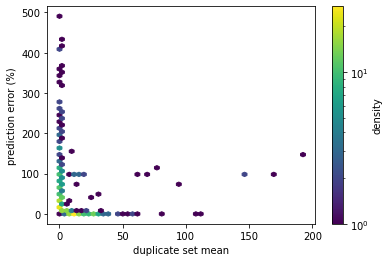

In [18]:
pwx_sets = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("app").str.contains("pw.x")]
plot_data = pd.DataFrame({"error_percent":pwx_sets[("error_percent","median")].values,"dup_mean":pwx_sets.index.get_level_values("dup_mean")})
hb = plt.hexbin(x=plot_data["dup_mean"],y=plot_data["error_percent"] * 100,bins="log",gridsize=(50,30))
plt.colorbar(hb,label="density")
plt.xlabel("duplicate set mean")
plt.ylabel("prediction error (%)")
plt.savefig(Path("pictures","theta_transfer_pwx_mae_error_agg").with_suffix(".svg"),format="svg",bbox_inches="tight")

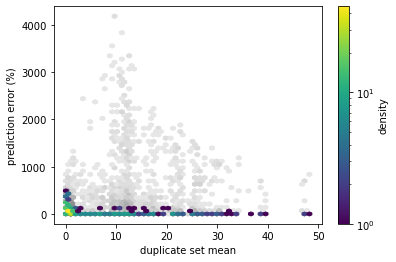

In [19]:
pwx_sets = df_mae_by_app[df_mae_by_app["app"].str.contains("pw.x") & (df_mae_by_app["error_percent"] < 100) & (df_mae_by_app["dup_mean"] <= 50)]
pwx_sets_median = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("app").str.contains("pw.x")  & (df_mae_by_app_agg.index.get_level_values("dup_mean") <= 50)]
plot_app_errors(pwx_sets,pwx_sets_median)
plt.savefig(Path("pictures","theta_transfer_pwx_mae_error_non_agg_low").with_suffix(".svg"),format="svg",bbox_inches="tight")

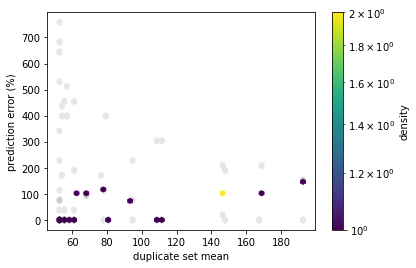

In [27]:
pwx_sets = df_mae_by_app[df_mae_by_app["app"].str.contains("pw.x") & (df_mae_by_app["error_percent"] < 100) & (df_mae_by_app["dup_mean"] > 50)]
pwx_sets_median = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("app").str.contains("pw.x")  & (df_mae_by_app_agg.index.get_level_values("dup_mean") > 50)]
plot_app_errors(pwx_sets,pwx_sets_median,(50,20),(50,5))
plt.savefig(Path("pictures","theta_transfer_pwx_mae_error_non_agg_high").with_suffix(".svg"),format="svg",bbox_inches="tight")

#### Boxplots

Boxplots per duplicate set only make sense if the duplicate sets are large enough

In [11]:
df_large_sets_pwx = pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("app").str.contains("pw.x") & (df_mae_by_app_agg[("app","count")] > 100)]).reset_index()
df_large_sets_pwx

app   dup_mean    app error_percent        POSIX_TOTAL_TIME               \
                     count        median  count             mean          var   
0   pw.x  26.482347    120      0.009546    120        26.482347  4761.161008   
1   pw.x  25.387623    148      0.010531    148        25.387623  5953.991745   
2   pw.x  22.826111    151      0.011383    151        22.826111  4995.048145   
3   pw.x  22.249491    108      0.012705    108        22.249491  4610.994797   
4   pw.x  22.203737    102      0.011676    102        22.203737  6030.023506   
5   pw.x  17.865087    117      0.015449    117        17.865087  3219.348149   
6   pw.x  17.162653    163      0.016869    163        17.162653  3551.059705   
7   pw.x  13.134005    279      0.022803    279        13.134005  2587.803666   
8   pw.x  12.712165    134      0.018680    134        12.712165  1816.498572   
9   pw.x  12.570089    363      0.023031    363        12.570089  2312.365264   
10  pw.x  12.544182    244      0.019648    244        12.544182  1744.306530   
11  pw.x  12.299134    233      0.018963    233        12.299134  2190.071721   
12  pw.x  12.143692    124      0.018983    124        12.143692  2421.732040   
13  pw.x  12.071466    366      0.025330    366        12.071466  1989.545819   
14  pw.x  11.615713    153      0.026831    153        11.615713  2672.427334   
15  pw.x  11.403251    285      0.026497    285        11.403251  1915.841483   
16  pw.x  11.242140    146      0.026311    146        11.242140  1705.544602   
17  pw.x  10.794726    215      0.022108    215        10.794726  1991.936950   
18  pw.x  10.452372    164      0.029947    164        10.452372  2574.411249   
19  pw.x  10.413978    112      0.022098    112        10.413978  1348.661569   
20  pw.x   9.830752    123      0.030500    123         9.830752  1854.837313   
21  pw.x   9.423698    244      0.025506    244         9.423698  1412.518020   
22  pw.x   9.158112    208      0.030711    208         9.158112  1294.675376   
23  pw.x   7.757916    108      0.037311    108         7.757916   848.336480   
24  pw.x   1.358942    111      0.372302    111         1.358942     0.274678   
25  pw.x   1.350846   4828      0.122553   4828         1.350846   237.440115   
26  pw.x   1.343590   1040      0.383523   1040         1.343590     0.236601   
27  pw.x   1.221651   1963      0.397288   1963         1.221651     0.041323   
28  pw.x   1.210457   2469      0.138298   2469         1.210457   150.500792   
29  pw.x   1.194406   2776      0.349394   2776         1.194406     0.102294   
30  pw.x   1.191031  20276      0.347954  20276         1.191031     0.098550   
31  pw.x   1.148488    388      0.338061    388         1.148488     0.068266   
32  pw.x   1.125637    250      0.299885    250         1.125637     0.159213   
33  pw.x   1.105295    368      0.318058    368         1.105295     0.029371   
34  pw.x   0.981301   1518      0.165271   1518         0.981301     0.262881   
35  pw.x   0.976313    653      0.184239    653         0.976313     0.048154   
36  pw.x   0.970097    487      0.175613    487         0.970097     0.071098   
37  pw.x   0.966100    176      0.165252    176         0.966100     0.054746   
38  pw.x   0.935574    527      0.165152    527         0.935574     0.015482   
39  pw.x   0.931801    132      0.145432    132         0.931801     0.017815   
40  pw.x   0.929601    109      0.160733    109         0.929601     0.018257   

   POSIX_TOTAL_TIME_predicted            
                         mean       var  
0                   -0.025900  0.018780  
1                   -0.026778  0.018369  
2                   -0.034764  0.019031  
3                   -0.053144  0.018424  
4                   -0.046645  0.020093  
5                   -0.039098  0.018532  
6                   -0.063429  0.022082  
7                   -0.084125  0.021082  
8                   -0.033999  0.017240  
9                   -0.084411  0.019888  
10               

In [12]:
mean_selection_ids_pwx = [0,9,21,30,38]

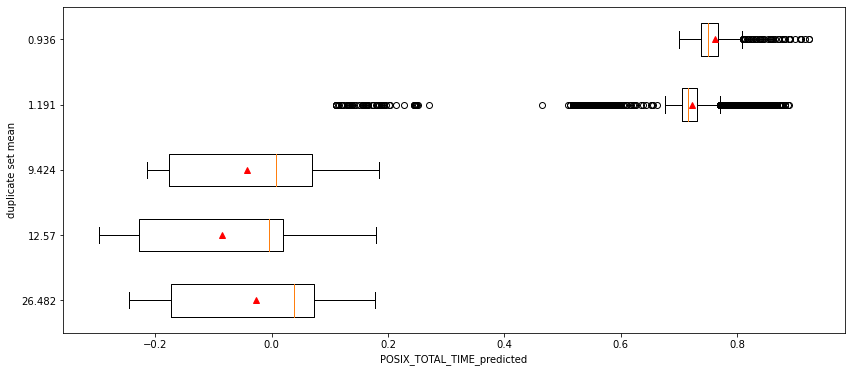

In [20]:
plot_boxplot(df_large_sets_pwx,"pw.x",mean_selection_ids_pwx,"POSIX_TOTAL_TIME_predicted",True,True)
plt.savefig(Path("pictures","theta_transfer_pwx_boxplot_predicted.png").with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)

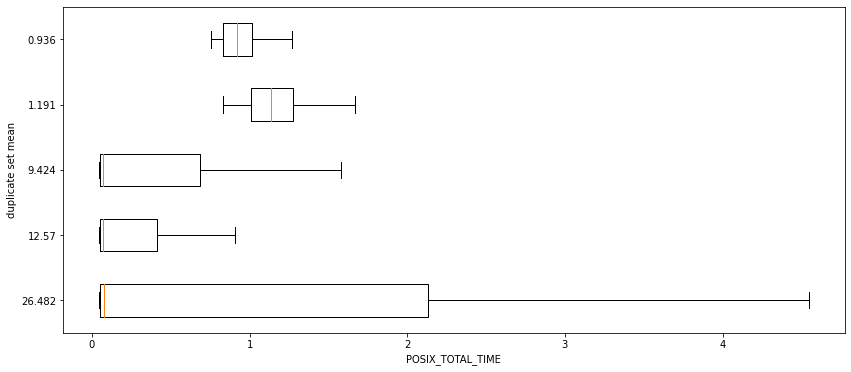

In [16]:
plot_boxplot(df_large_sets_pwx,"pw.x",mean_selection_ids_pwx,"POSIX_TOTAL_TIME",False)
plt.savefig(Path("pictures","theta_transfer_pwx_boxplot_actual.png").with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)

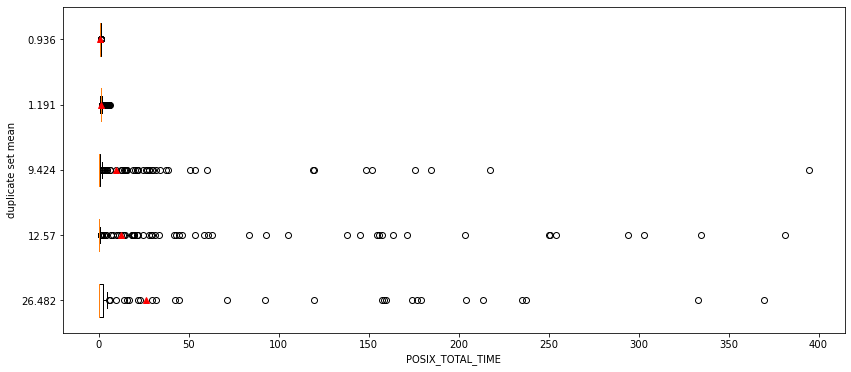

In [19]:
plot_boxplot(df_large_sets_pwx,"pw.x",mean_selection_ids_pwx,"POSIX_TOTAL_TIME",True,True)
plt.savefig(Path("pictures","theta_transfer_pwx_boxplot_actual_withfliers.png").with_suffix(".png"),format="png",bbox_inches="tight",dpi=600)

### cp2k

In [31]:
df_large_sets_cp2k = pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("app").str.contains("cp2k")]).reset_index()
df_large_sets_cp2k

app    dup_mean   app error_percent       POSIX_TOTAL_TIME  \
                           count        median count             mean   
0    cp2k.psmp  605.776131     6      2.944308     6       605.776131   
1    cp2k.psmp  596.476535     3      2.994739     3       596.476535   
2    cp2k.psmp  346.175999     2      6.065992     2       346.175999   
3    cp2k.psmp  110.549699     2     21.119952     2       110.549699   
4    cp2k.psmp  106.249756     2     22.016220     2       106.249756   
5    cp2k.psmp  103.883285     2     21.576434     2       103.883285   
6    cp2k.psmp  102.808169     2     22.730940     2       102.808169   
7    cp2k.psmp  101.017298     2     23.153117     2       101.017298   
8    cp2k.psmp   99.462648     2     23.593956     2        99.462648   
9    cp2k.psmp   53.436285     2     44.757452     2        53.436285   
10   cp2k.psmp   46.523643     2     51.572337     2        46.523643   
11   cp2k.psmp   43.060125     4     54.388076     4        43.060125   
12   cp2k.psmp   39.373848     2     66.063426     2        39.373848   
13   cp2k.psmp   39.313333     2     66.172399     2        39.313333   
14   cp2k.psmp   39.197757     2     66.357211     2        39.197757   
15   cp2k.psmp   39.194922     2     61.393165     2        39.194922   
16   cp2k.psmp   39.068468     2     66.606212     2        39.068468   
17   cp2k.psmp   38.764103     2     62.081664     2        38.764103   
18   cp2k.psmp   37.682804     2     63.892103     2        37.682804   
19   cp2k.psmp   37.631518     2     63.980891     2        37.631518   
20   cp2k.psmp   36.901698     2     65.291325     2        36.901698   
21   cp2k.psmp   35.128905     3     74.030319     3        35.128905   
22   cp2k.psmp   34.832848     3     74.691180     3        34.832848   
23   cp2k.psmp   34.695367     3     75.002034     3        34.695367   
24   cp2k.psmp   34.566617     2     69.759225     2        34.566617   
25   cp2k.psmp   34.553206     3     75.298208     3        34.553206   
26   cp2k.psmp   34.165633     2     76.301314     2        34.165633   
27   cp2k.psmp   33.631730   183     69.923565   183        33.631730   
28   cp2k.psmp   33.155875     2     78.637489     2        33.155875   
29   cp2k.psmp   32.892807     2     79.266861     2        32.892807   
30   cp2k.psmp   32.871836     2     79.323706     2        32.871836   
31   cp2k.psmp   32.783620     2     79.538628     2        32.783620   
32   cp2k.psmp   32.732347     2     79.674160     2        32.732347   
33   cp2k.psmp   32.651296     2     79.859201     2        32.651296   
34   cp2k.psmp   32.482758     2     80.294687     2        32.482758   
35   cp2k.psmp   32.463349     8     72.487756     8        32.463349   
36   cp2k.psmp   32.451113     2     80.383936     2        32.451113   
37   cp2k.psmp   32.438112     2     80.387765     2        32.438112   
38   cp2k.psmp   32.434254     2     80.426033     2        32.434254   
39   cp2k.psmp   32.432997     2     80.402899     2        32.432997   
40   cp2k.psmp   32.420058     2     80.457375     2        32.420058   
41   cp2k.psmp   32.414107     2     74.458695     2        32.414107   
42   cp2k.psmp   32.397192     2     80.609033     2        32.397192   
43   cp2k.psmp   32.382186    88     72.655743    88        32.382186   
44   cp2k.psmp   32.298173     2     80.759898     2        32.298173   
45   cp2k.psmp   32.276664     2     80.826929     2        32.276664   
46   cp2k.psmp   32.261903     2     80.832427     2        32.261903   
47   cp2k.psmp   32.164553     2     81.099869     2        32.164553   
48   cp2k.psmp   32.070208    75     73.369995    75        32.070208   
49   cp2k.psmp   31.954851     2     73.646863     2        31.954851   
50   cp2k.psmp   31.913841   202     73.739668   202        31.913841   
51   cp2k.psmp   31.907008     2     81.757951     2        31.907008   
52   cp2k.psmp   31.853999     4     73.880703     4        31.853999

In [36]:
df_theta_posix[df_theta_posix["mean"] == df_large_sets_cp2k.iloc[27]["dup_mean"][0]]

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,POSIX_MAX_BYTE_READ,POSIX_MAX_BYTE_WRITTEN,POSIX_CONSEC_READS,POSIX_CONSEC_WRITES,POSIX_SEQ_READS,POSIX_SEQ_WRITES,POSIX_RW_SWITCHES,POSIX_MEM_NOT_ALIGNED,POSIX_MEM_ALIGNMENT,POSIX_FILE_NOT_ALIGNED,POSIX_FILE_ALIGNMENT,POSIX_MAX_READ_TIME_SIZE,POSIX_MAX_WRITE_TIME_SIZE,POSIX_SIZE_READ_0_100,POSIX_SIZE_READ_100_1K,POSIX_SIZE_READ_1K_10K,POSIX_SIZE_READ_10K_100K,POSIX_SIZE_READ_100K_1M,POSIX_SIZE_READ_1M_4M,POSIX_SIZE_READ_4M_10M,POSIX_SIZE_READ_10M_100M,POSIX_SIZE_READ_100M_1G,POSIX_SIZE_READ_1G_PLUS,POSIX_SIZE_WRITE_0_100,POSIX_SIZE_WRITE_100_1K,POSIX_SIZE_WRITE_1K_10K,POSIX_SIZE_WRITE_10K_100K,POSIX_SIZE_WRITE_100K_1M,POSIX_SIZE_WRITE_1M_4M,POSIX_SIZE_WRITE_4M_10M,POSIX_SIZE_WRITE_10M_100M,POSIX_SIZE_WRITE_100M_1G,POSIX_SIZE_WRITE_1G_PLUS,POSIX_STRIDE1_STRIDE,POSIX_STRIDE2_STRIDE,POSIX_STRIDE3_STRIDE,POSIX_STRIDE4_STRIDE,POSIX_STRIDE1_COUNT,POSIX_STRIDE2_COUNT,POSIX_STRIDE3_COUNT,POSIX_STRIDE4_COUNT,POSIX_ACCESS1_ACCESS,POSIX_ACCESS2_ACCESS,POSIX_ACCESS3_ACCESS,POSIX_ACCESS4_ACCESS,POSIX_ACCESS1_COUNT,POSIX_ACCESS2_COUNT,POSIX_ACCESS3_COUNT,POSIX_ACCESS4_COUNT,POSIX_FASTEST_RANK,POSIX_FASTEST_RANK_BYTES,POSIX_SLOWEST_RANK,POSIX_SLOWEST_RANK_BYTES,READ_0_100,READ_100_1K,READ_1K_10K,READ_10K_100K,READ_100K_1M,READ_1M_4M,READ_4M_10M,READ_10M_100M,READ_100M_1G,READ_1G_PLUS,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,app,mean,error,POSIX_TOTAL_TIME_predicted
4,4,4,7891771,7861736,0,3,424661,60035,90055,0,0,0,0,10950,2655,26585820,2654,26540408,2,394627,2,424627,0,380419,1856,424629,27262973,2655,1116,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3963,1026,555,984,290545,80352,50245,225,117,0,0,0,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,34.010366,64,1,cp2k.psmp,33.63173,0.378636,2385.1807
38,38,38,7891771,7861736,0,3,424661,60035,90055,0,0,0,0,10950,2655,26585820,2654,26540408,2,394627,2,424627,0,380419,1856,424629,27262973,2655,1116,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3963,1026,555,984,290545,80352,50245,225,132,0,0,0,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,32.735842,64,1,cp2k.psmp,33.63173,-0.895888,2385.4258
89,89,89,7891771,7861736,0,3,424661,60035,90055,0,0,0,0,10950,2655,26585820,2654,26540408,2,394627,2,424627,0,380419,1856,424629,27262973,2655,1211,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3963,1026,555,984,290545,80352,50245,225,141,0,0,0,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,32.893440,64,1,cp2k.psmp,33.63173,-0.738289,2385.5723
125,125,125,7891771,7861736,0,3,424661,60035,90055,0,0,0,0,10950,2655,26585820,2654,26540408,2,394627,2,424627,0,380419,1856,424629,27262973,2655,1211,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3963,1026,555,984,290545,80352,50245,225,97,0,0,0,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,36.938808,64,1,cp2k.psmp,33.63173,3.307079,2384.8538
184,184,184,7891771,7861736,0,3,424661,60035,90055,0,0,0,0,10950,2655,26585820,2654,26540408,2,394627,2,424627,0,380419,1856,424629,27262973,2655,1211,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3963,1026,555,984,290545,80352,50245,225,136,0,0,0,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,33.702320,64,1,cp2k.psmp,33.63173,0.070590,2385.4912
317,317,317,7891771,7861736,0,3,424661,60035,90055,0,0,0,0,10950,2655,26585820,2654,26540408,2,394627,2,424627,0,380419,1856,424629,27262973,2655,1211,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3963,1026,555,984,290545,80352,50245,225,88,0,0,0,2,0,1,0,0,0,0,0,0,0,414629,10032,0,0,0,0,0,0,0,0,0,33.583615,64,1,cp2k.psmp,33.63173,-0.048115,2384.7075
384,384,384,7891771,7861736,0,3,424661,60035,90055,0,0,0,0,109

In [37]:
df_theta_posix[df_theta_posix["mean"] == df_large_sets_cp2k.iloc[0]["dup_mean"][0]]

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,POSIX_MAX_BYTE_READ,POSIX_MAX_BYTE_WRITTEN,POSIX_CONSEC_READS,POSIX_CONSEC_WRITES,POSIX_SEQ_READS,POSIX_SEQ_WRITES,POSIX_RW_SWITCHES,POSIX_MEM_NOT_ALIGNED,POSIX_MEM_ALIGNMENT,POSIX_FILE_NOT_ALIGNED,POSIX_FILE_ALIGNMENT,POSIX_MAX_READ_TIME_SIZE,POSIX_MAX_WRITE_TIME_SIZE,POSIX_SIZE_READ_0_100,POSIX_SIZE_READ_100_1K,POSIX_SIZE_READ_1K_10K,POSIX_SIZE_READ_10K_100K,POSIX_SIZE_READ_100K_1M,POSIX_SIZE_READ_1M_4M,POSIX_SIZE_READ_4M_10M,POSIX_SIZE_READ_10M_100M,POSIX_SIZE_READ_100M_1G,POSIX_SIZE_READ_1G_PLUS,POSIX_SIZE_WRITE_0_100,POSIX_SIZE_WRITE_100_1K,POSIX_SIZE_WRITE_1K_10K,POSIX_SIZE_WRITE_10K_100K,POSIX_SIZE_WRITE_100K_1M,POSIX_SIZE_WRITE_1M_4M,POSIX_SIZE_WRITE_4M_10M,POSIX_SIZE_WRITE_10M_100M,POSIX_SIZE_WRITE_100M_1G,POSIX_SIZE_WRITE_1G_PLUS,POSIX_STRIDE1_STRIDE,POSIX_STRIDE2_STRIDE,POSIX_STRIDE3_STRIDE,POSIX_STRIDE4_STRIDE,POSIX_STRIDE1_COUNT,POSIX_STRIDE2_COUNT,POSIX_STRIDE3_COUNT,POSIX_STRIDE4_COUNT,POSIX_ACCESS1_ACCESS,POSIX_ACCESS2_ACCESS,POSIX_ACCESS3_ACCESS,POSIX_ACCESS4_ACCESS,POSIX_ACCESS1_COUNT,POSIX_ACCESS2_COUNT,POSIX_ACCESS3_COUNT,POSIX_ACCESS4_COUNT,POSIX_FASTEST_RANK,POSIX_FASTEST_RANK_BYTES,POSIX_SLOWEST_RANK,POSIX_SLOWEST_RANK_BYTES,READ_0_100,READ_100_1K,READ_1K_10K,READ_10K_100K,READ_100K_1M,READ_1M_4M,READ_4M_10M,READ_10M_100M,READ_100M_1G,READ_1G_PLUS,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,app,mean,error,POSIX_TOTAL_TIME_predicted
5581,5581,5581,7891771,7861736,0,3,424660,60035,90055,0,0,0,0,10950,2653,26585899,2652,26540442,2,394626,2,424626,0,381294,1856,424625,27262973,2653,1168,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3961,1026,555,984,290544,80352,50245,225,146,0,0,0,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,635.799299,64,1,cp2k.psmp,605.776131,30.023168,2385.7053
6336,6336,6336,7891771,7861736,0,3,424660,60035,90055,0,0,0,0,10950,2653,26585899,2652,26540442,2,394626,2,424626,0,381294,1856,424625,27262973,2653,1220,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3961,1026,555,984,290544,80352,50245,225,147,0,0,0,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,606.518376,64,1,cp2k.psmp,605.776131,0.742245,2385.7220
8383,8383,8383,7891771,7861736,0,3,424660,60035,90055,0,0,0,0,10950,2653,26585899,2652,26540442,2,394626,2,424626,0,381294,1856,424625,27262973,2653,1116,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3961,1026,555,984,290544,80352,50245,225,107,0,0,0,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,590.952763,64,1,cp2k.psmp,605.776131,-14.823368,2385.0676
9238,9238,9238,7891771,7861736,0,3,424660,60035,90055,0,0,0,0,10950,2653,26585899,2652,26540442,2,394626,2,424626,0,381294,1856,424625,27262973,2653,1263,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3961,1026,555,984,290544,80352,50245,225,83,0,0,0,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,596.446682,64,1,cp2k.psmp,605.776131,-9.329449,2384.6763
11866,11866,11866,7891771,7861736,0,3,424660,60035,90055,0,0,0,0,10950,2653,26585899,2652,26540442,2,394626,2,424626,0,381294,1856,424625,27262973,2653,1168,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3961,1026,555,984,290544,80352,50245,225,92,0,0,0,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,596.843281,64,1,cp2k.psmp,605.776131,-8.932850,2384.8228
13592,13592,13592,7891771,7861736,0,3,424660,60035,90055,0,0,0,0,10950,2653,26585899,2652,26540442,2,394626,2,424626,0,381294,1856,424625,27262973,2653,1168,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3961,1026,555,984,290544,80352,50245,225,110,0,0,0,2,0,1,0,0,0,0,0,0,0,414628,10032,0,0,0,0,0,0,0,0,0,608.096385,64,1,cp2k.psmp,605.776131,2.320254,2385.1170


In [40]:
df_theta_posix[(df_theta_posix.app.str.contains("cp2k")) & (df_theta_posix.POSIX_FILENOS > 5e8)]

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,POSIX_MAX_BYTE_READ,POSIX_MAX_BYTE_WRITTEN,POSIX_CONSEC_READS,POSIX_CONSEC_WRITES,POSIX_SEQ_READS,POSIX_SEQ_WRITES,POSIX_RW_SWITCHES,POSIX_MEM_NOT_ALIGNED,POSIX_MEM_ALIGNMENT,POSIX_FILE_NOT_ALIGNED,POSIX_FILE_ALIGNMENT,POSIX_MAX_READ_TIME_SIZE,POSIX_MAX_WRITE_TIME_SIZE,POSIX_SIZE_READ_0_100,POSIX_SIZE_READ_100_1K,POSIX_SIZE_READ_1K_10K,POSIX_SIZE_READ_10K_100K,POSIX_SIZE_READ_100K_1M,POSIX_SIZE_READ_1M_4M,POSIX_SIZE_READ_4M_10M,POSIX_SIZE_READ_10M_100M,POSIX_SIZE_READ_100M_1G,POSIX_SIZE_READ_1G_PLUS,POSIX_SIZE_WRITE_0_100,POSIX_SIZE_WRITE_100_1K,POSIX_SIZE_WRITE_1K_10K,POSIX_SIZE_WRITE_10K_100K,POSIX_SIZE_WRITE_100K_1M,POSIX_SIZE_WRITE_1M_4M,POSIX_SIZE_WRITE_4M_10M,POSIX_SIZE_WRITE_10M_100M,POSIX_SIZE_WRITE_100M_1G,POSIX_SIZE_WRITE_1G_PLUS,POSIX_STRIDE1_STRIDE,POSIX_STRIDE2_STRIDE,POSIX_STRIDE3_STRIDE,POSIX_STRIDE4_STRIDE,POSIX_STRIDE1_COUNT,POSIX_STRIDE2_COUNT,POSIX_STRIDE3_COUNT,POSIX_STRIDE4_COUNT,POSIX_ACCESS1_ACCESS,POSIX_ACCESS2_ACCESS,POSIX_ACCESS3_ACCESS,POSIX_ACCESS4_ACCESS,POSIX_ACCESS1_COUNT,POSIX_ACCESS2_COUNT,POSIX_ACCESS3_COUNT,POSIX_ACCESS4_COUNT,POSIX_FASTEST_RANK,POSIX_FASTEST_RANK_BYTES,POSIX_SLOWEST_RANK,POSIX_SLOWEST_RANK_BYTES,READ_0_100,READ_100_1K,READ_1K_10K,READ_10K_100K,READ_100K_1M,READ_1M_4M,READ_4M_10M,READ_10M_100M,READ_100M_1G,READ_1G_PLUS,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,app,mean,error,POSIX_TOTAL_TIME_predicted
210627,210627,210627,516196627,516196609,0,1434,30990,30394,8273,0,0,6,6,876,11654367,4645256610,10414641,1161357540,1411,30985,1411,30986,0,32417,896,32397,9175037,47591,153265,5,0,1429,0,0,0,0,0,0,0,649,0,9,12,30320,0,0,0,0,0,0,0,0,0,0,0,0,0,200980,101527,47667,30544,31636,507,45,28,25435,0,10688,136831,5,0,1429,0,0,0,0,0,0,0,649,0,9,12,30320,0,0,0,0,0,-1,651.141837,8192,1,cp2k.psmp,NaN,0.0,153887.05


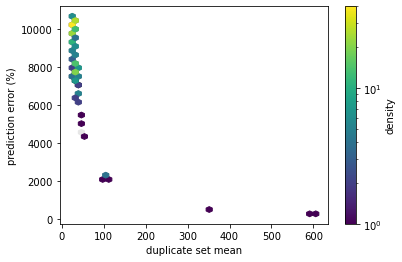

In [21]:
pwx_sets = df_mae_by_app[df_mae_by_app["app"].str.contains("cp2k")]# & (df_mae_by_app["dup_mean"] <= 1000)]
pwx_sets_median = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("app").str.contains("cp2k")]#  & (df_mae_by_app_agg.index.get_level_values("dup_mean") <= 1000)]
plot_app_errors(pwx_sets,pwx_sets_median,40,40)
plt.savefig(Path("pictures","theta_transfer_cp2k_mae_error_non_agg").with_suffix(".svg"),format="svg",bbox_inches="tight")

## Softplus experiments

<AxesSubplot:ylabel='Density'>

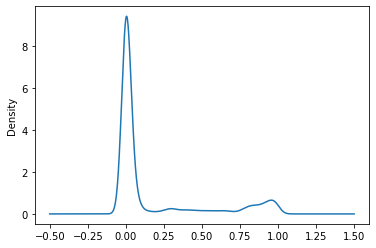

In [63]:
df_theta_posix[df_theta_posix.POSIX_TOTAL_TIME < 1].POSIX_TOTAL_TIME.plot.kde()

In [72]:
df_theta_posix[df_theta_posix.POSIX_TOTAL_TIME < 0.25e-1]

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,app,mean,error,POSIX_TOTAL_TIME_predicted
213,213,213,11,10,0,8,2,2,13,0,...,0,0,-1,0.011388,2,1,sw4lite,0.011151,0.000237,0.047070
219,219,219,1,1,0,0,1,0,0,0,...,0,0,-1,0.000861,1,0,miniFE_theta_online_perf_low_cap.x,0.000965,-0.000104,0.048976
226,226,226,1,1,0,0,1,0,0,0,...,0,0,-1,0.001482,1,0,miniFE_theta_online_perf_iter_papi_freq.x,0.000948,0.000534,0.048974
232,232,232,10,10,0,0,10,0,2,0,...,0,0,0,0.002393,4,0,bs-solctra-multinode,NaN,0.000000,-0.202883
240,240,240,1,1,0,0,1,0,0,0,...,0,0,-1,0.000781,1,0,miniFE_theta_online_perf_low_cap.x,0.000903,-0.000122,0.048974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218038,218038,218038,1005,1005,0,0,0,0,9,-5,...,0,0,0,0.002957,32,1,nwchem,0.003087,-0.000130,-0.636216
218049,218049,218049,2943,2943,0,0,0,0,8,-4,...,0,0,0,0.003288,128,1,nwchem,0.003325,-0.000037,-0.618389
218080,218080,218080,0,-4,-4,0,0,0,5,0,...,0,0,-1,0.001277,1,1,gmx_mpi,0.002336,-0.001059,0.018569
218091,218091,218091,2931,2931,0,0,0,0,8,-4,...,0,0,0,0.003178,128,1,nwchem,0.003321,-0.000143,-0.431317


In [4]:
df_theta_posix[(df_theta_posix.app == "nwchem") == False]

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,app,mean,error,POSIX_TOTAL_TIME_predicted
0,0,0,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,29.684507,64,1,cp2k.psmp,31.913841,-2.229334,2384.751500
1,1,1,194,172,0,34,1499,6,54,0,...,0,0,0,28.155456,16,1,pw.x,11.403251,16.752206,-0.229327
2,2,2,46037,40869,0,4713059,1719073,1271774,5429,0,...,0,0,-1,71229.030892,128,1,train.x-2.0.3-ifort_intelmpi,NaN,0.000000,195.657650
3,3,3,194,172,0,34,1492,6,54,0,...,0,0,2,1.707640,16,1,pw.x,6.519022,-4.811382,-0.105347
4,4,4,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,34.010366,64,1,cp2k.psmp,33.631730,0.378636,2385.180700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218106,218106,218106,618,0,0,15040,10450,21,1555,0,...,0,0,-1,6.904750,64,1,vasp_ncl,NaN,0.000000,3.355794
218107,218107,218107,68,-22,-22,7829,0,0,116,0,...,0,0,-1,1.194060,16,1,pw.x,1.221651,-0.027592,0.722458
218108,218108,218108,34713,34116,0,8745,49849,240,504,-335,...,0,0,-1,220.660687,96,1,qmcpack,NaN,0.000000,3.855555
218109,218109,218109,68,-22,-22,7829,0,0,116,0,...,0,0,-1,1.274516,16,1,pw.x,1.221651,0.052865,0.704569


In [7]:
neg_threshold = df_theta_posix[df_theta_posix.POSIX_TOTAL_TIME_predicted < 0].POSIX_TOTAL_TIME.median()
filterspec = (df_theta_posix.POSIX_TOTAL_TIME < neg_threshold) & (df_theta_posix.POSIX_TOTAL_TIME_predicted < 0)
df_theta_posix_no_zeros = df_theta_posix[filterspec == False]